<a href="https://colab.research.google.com/github/aldyhassan/lilproject/blob/main/UK_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Importing Datasets

In [ ]:
# Read data in Google Sheets
sheet_url = 'https://docs.google.com/spreadsheets/d/1MH7hdDLkYoHH-LYqcomzU3sTfrJY6en5/edit#gid=54676756'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# Open file
df = pd.read_csv(sheet_url_trf)
main_df = df.copy()
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# Converting InvoiceDate to timeseries

In [ ]:
# Change data type to date type (Year-Month-Day Hour-Minutes-Second format)
main_df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')
print(main_df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


# Dropping Missing Values

In [ ]:
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Checking for missing values
missing_values = main_df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

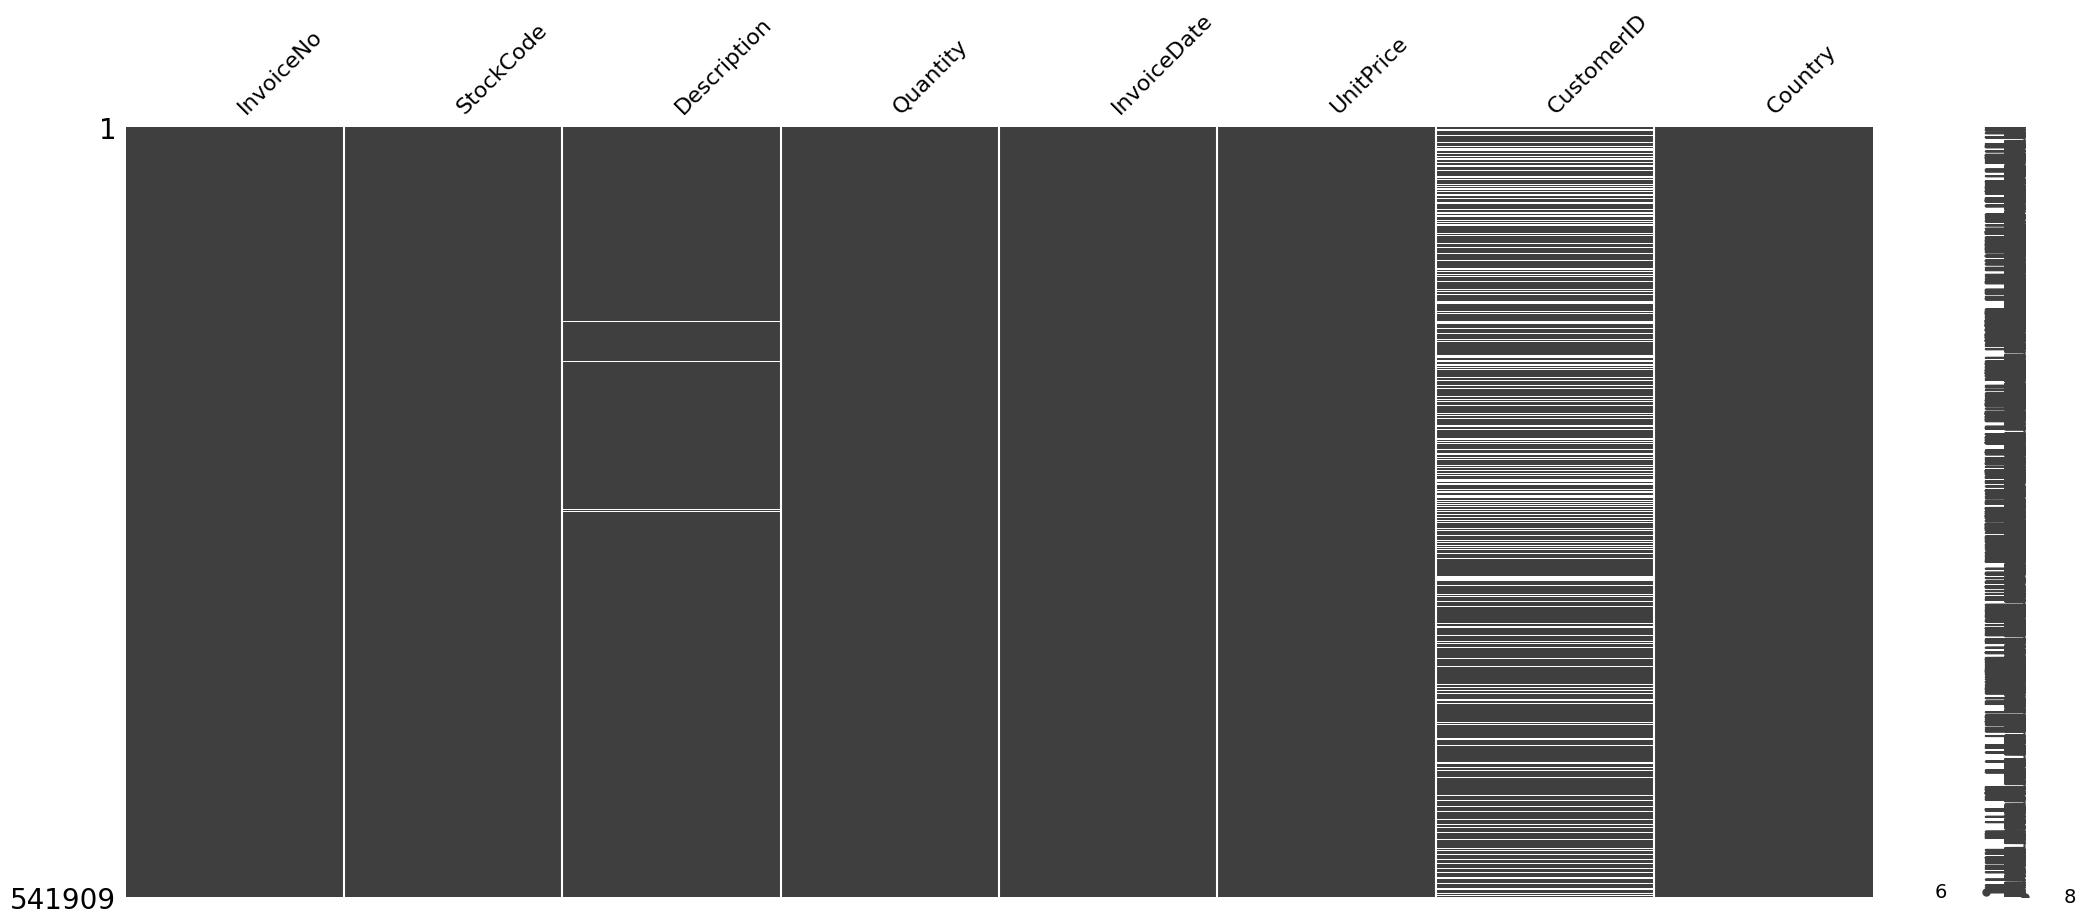

In [ ]:
# Checking for missing values visualization
msno.matrix(main_df)

In [ ]:
# Drop the missing values on CustomerID
main_df = main_df[main_df['CustomerID'].isna() == False]
main_df.reset_index()
main_df.reset_index(drop=True, inplace=True)

# Dealing with Outliers

In [ ]:
main_df[main_df['Description'] == 'POSTAGE'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1122,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
3868,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
4053,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France


In [ ]:
main_df[main_df['Description'] == 'DOTCOM POSTAGE'].head()
# DOTCOM POSTAGE & POSTAGE itself is postage cost that needed to be purchased by online customer, therefore do not affect the sales data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
230911,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom
234331,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom
242017,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom
246634,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom
256658,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom


In [ ]:
main_df[main_df['Description'] == 'CRUK Commission'].head()
# Seemingly this commission is allocated to Cancer Research UK, therefore does not affect the sales data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
230912,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
234352,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
242041,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
246653,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
257062,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom


In [ ]:
main_df[main_df['Description'] == 'Manual'].head()
# Since Manual is not defined, we can safely assume this is some kind of operating costs, which is not affecting the sales data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1698,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
1709,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
4707,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
5686,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
6240,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom


In [ ]:
# Dropping the outliers
outliers = ['DOTCOM POSTAGE', 'POSTAGE', 'CRUK Commission', 'Manual']
index_to_drop = main_df[main_df['Description'].isin(outliers)].index
main_df = main_df.drop(index_to_drop)

# Exploratory Data Analysis (EDA)

In [ ]:
# Summarizing the details of the dataset
maxdate = main_df['InvoiceDate'].dt.date.max()
mindate = main_df['InvoiceDate'].dt.date.min()
unique_customer = main_df['CustomerID'].nunique()
total_quantity = main_df['Quantity'].sum()
total_sales = main_df['TotalSales'].sum()

print(f"The Time Range of Transactions: {mindate} to {maxdate}")
print(f"Total Number of Unique Customers: {unique_customer}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Sales for the Period: {total_sales}")

The Time Range of Transactions: 2010-12-01 to 2011-12-09
Total Number of Unique Customers: 4363
Total Quantity Sold: 4900702
Total Sales for the Period: 8287768.103999999


In [ ]:
# Make a new column, total sales
main_df['TotalSales'] = main_df['Quantity'] * main_df['UnitPrice']
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<ipython-input-26-b5a535f9190b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=colors)


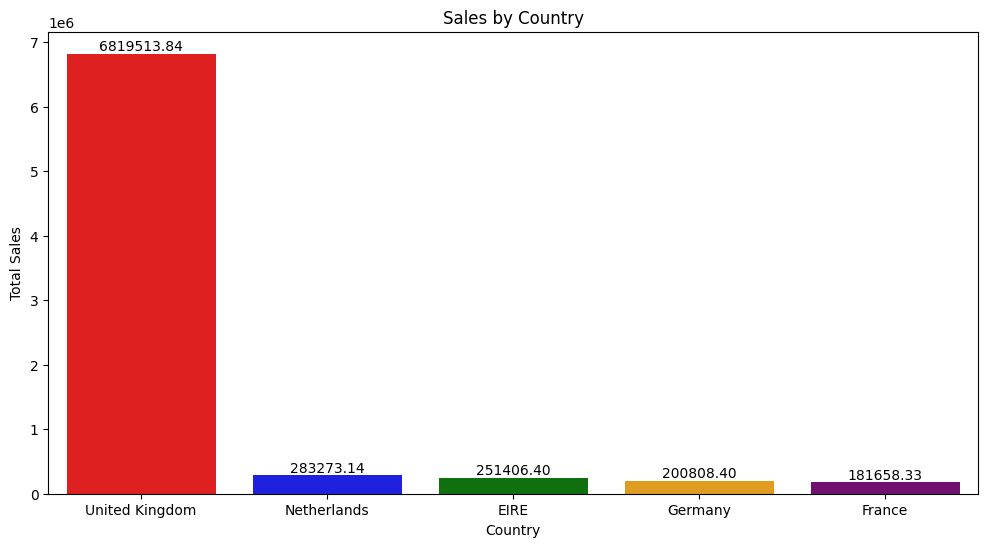

In [ ]:
# Sales by Country
sales_by_country = main_df.groupby('Country')['TotalSales'].sum().nlargest(5)

colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=colors)
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')

# Annotate each bar with its value
for i in range(len(sales_by_country)):
    plt.text(
        x=i,
        y=sales_by_country.values[i],
        s=f'{sales_by_country.values[i]:.2f}',  # Format the value to 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.show()

<ipython-input-27-cb47cdae19fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_products.index, y=top_products.values, palette = colors)


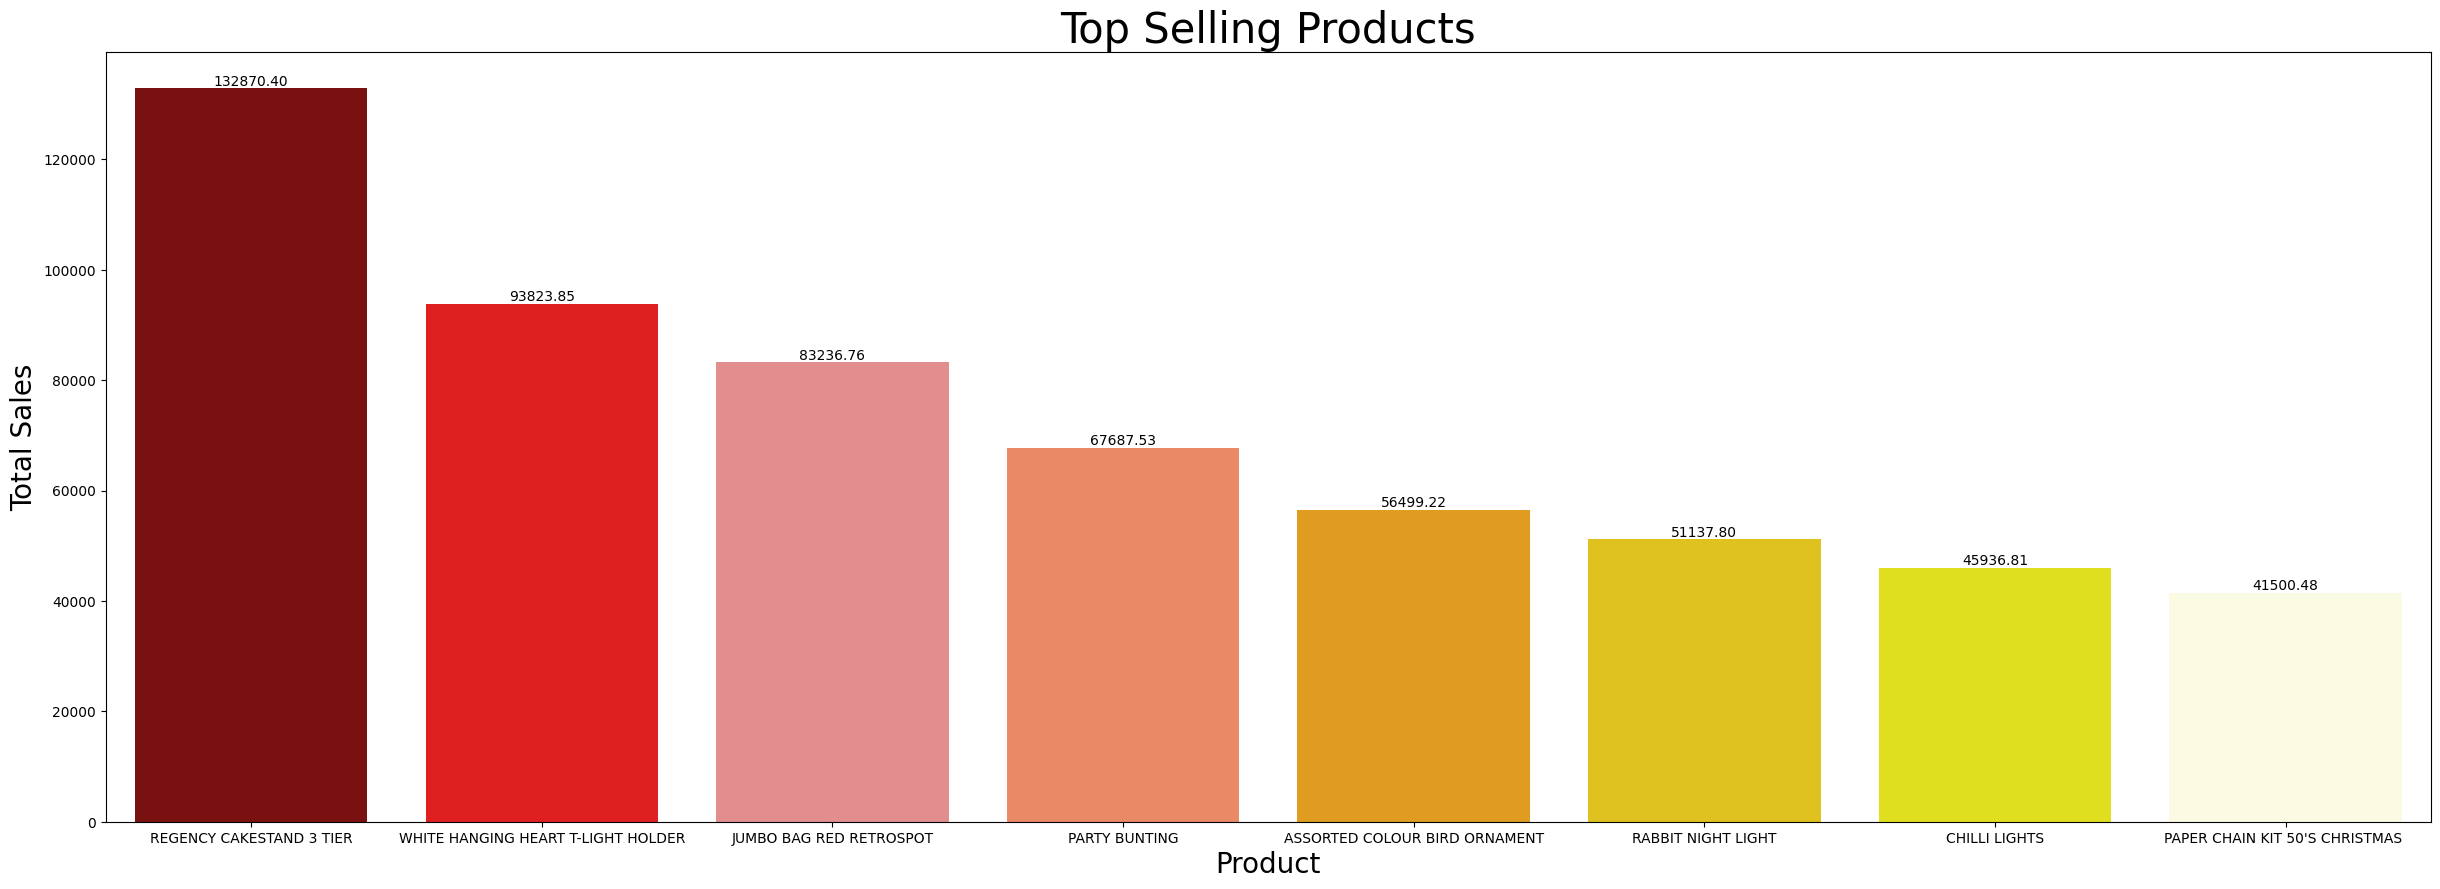

In [ ]:
# Top selling products
top_products = main_df.groupby('Description')['TotalSales'].sum().nlargest(8)

colors = ['#8B0000', '#FF0000', '#F08080', '#FF7F50', '#FFA500', '#FFD700', '#FFFF00', '#FFFFE0']

plt.figure(figsize=(30, 10))
ax = sns.barplot(x=top_products.index, y=top_products.values, palette = colors)
plt.title('Top Selling Products', fontsize = 30)
plt.xlabel('Product', fontsize = 20)
plt.ylabel('Total Sales', fontsize = 20)

# Annotate each bar with its value
for i in range(len(top_products)):
    plt.text(
        x=i,
        y=top_products.values[i],
        s=f'{top_products.values[i]:.2f}',  # Format the value to 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.show()

<ipython-input-71-2119803835a8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= refunds['Description'], y=refunds['Quantity'], palette = colors)


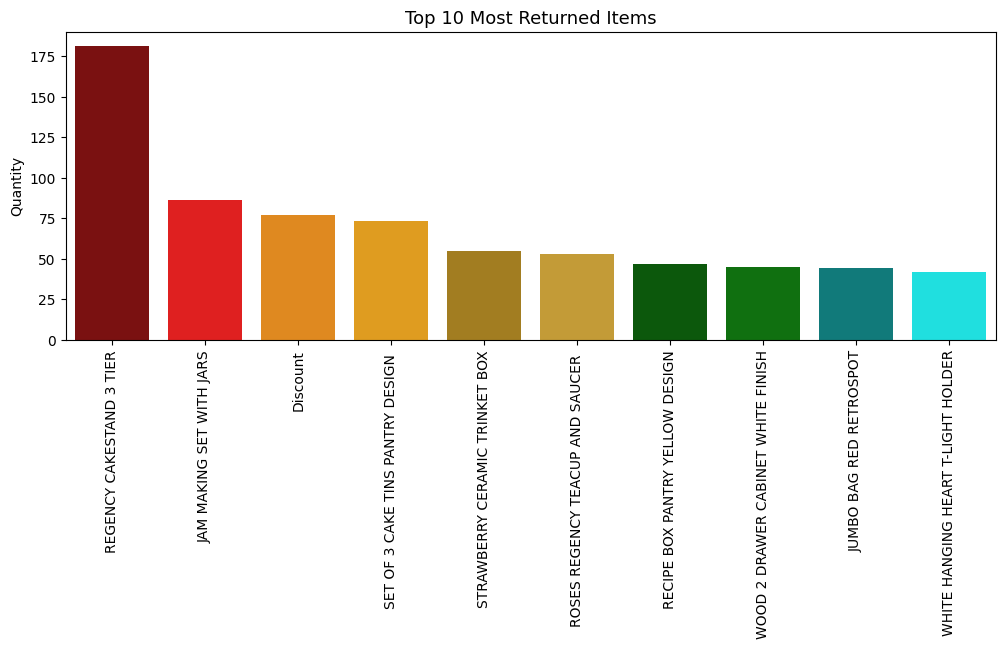

In [ ]:
# Most returned items
refunds = main_df[main_df['Quantity']<0]
refunds = refunds.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index()[:10]

colors = ['#8B0000', '#FF0000', '#FF8C00', '#FFA500', '#B8860B', '#DAA520', '#006400', '#008000', '#008B8B', '#00FFFF']

plt.figure(figsize=(12,4))
sns.barplot(x= refunds['Description'], y=refunds['Quantity'], palette = colors)
plt.title("Top 10 Most Returned Items", size=13)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [ ]:
# Analyze the sales trends over time (hourly, daily, weekly, monthly)
main_df['Hour'] = main_df['InvoiceDate'].dt.hour
main_df['Weekday'] = main_df['InvoiceDate'].dt.weekday
main_df['Days'] = main_df['InvoiceDate'].dt.day_name()
main_df['Month'] = main_df['InvoiceDate'].dt.month
main_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Hour,Weekday,Days,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,Wednesday,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,Wednesday,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,Wednesday,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,Wednesday,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,Wednesday,12


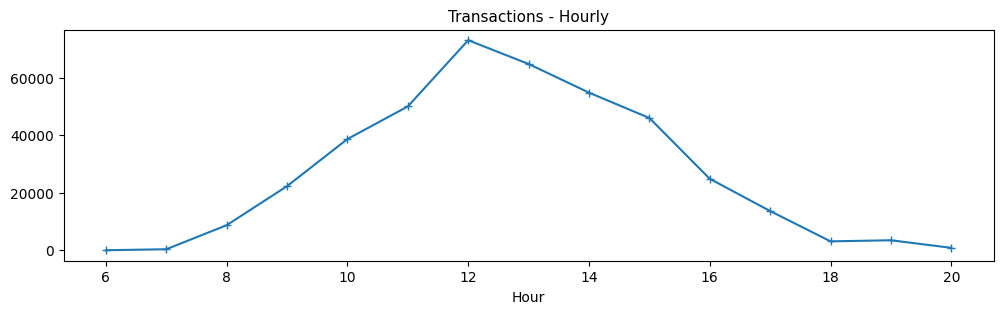

In [ ]:
# Sales transaction trend in hour a day
hourly = main_df.groupby('Hour')['Quantity'].count()
plt.figure(figsize=(12,3))
hourly.plot(marker='+')
plt.title("Transactions - Hourly", size=11)
plt.show()

The **highest** number of transactions occurs around **12:00**, reaching over **60,000** transactions. Possibly indicating a lunch hour rush for businesses. After noon, there is a gradual decline in transactions, this might indicate the end of the workday. From around 18:00 to 20:00, the number of transactions remains relatively low and stable. This could indicate a period of lower business activity or consumer engagement.

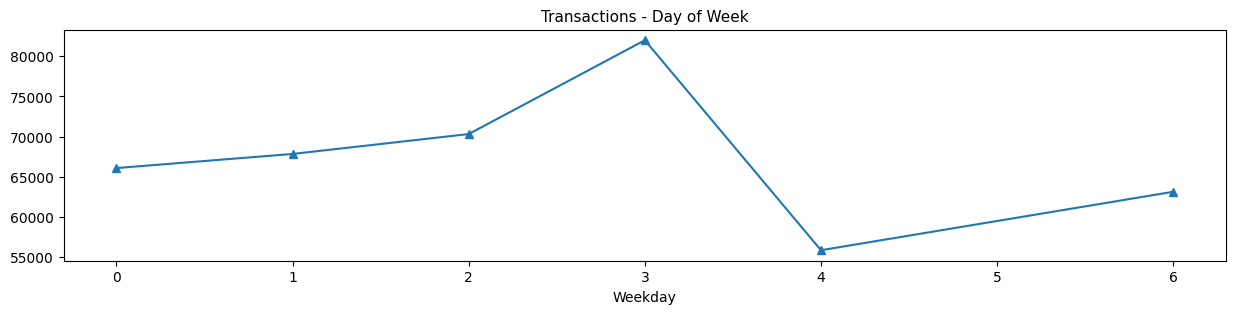

In [ ]:
# Sales transaction trend in day of week
weekly = main_df.groupby('Weekday')['Quantity'].count()
plt.figure(figsize=(15,3))
weekly.plot(marker='^')
plt.title("Transactions - Day of Week", size=11)
plt.show()

The **highest** number of transactions occurs on the **third day** of the week, reaching over **80,000** transactions. This suggests that this day is the busiest day of the week. The **lowest** number of transactions occurs on the **fourth day** of the week, dropping to below **60,000** transactions. After the peak on the third day, there is a sharp decline in transactions on the fourth day, followed by a gradual increase towards the end of the week The pattern indicates that there might be specific factors influencing higher transactions mid-week and lower transactions towards the latter part of the week.

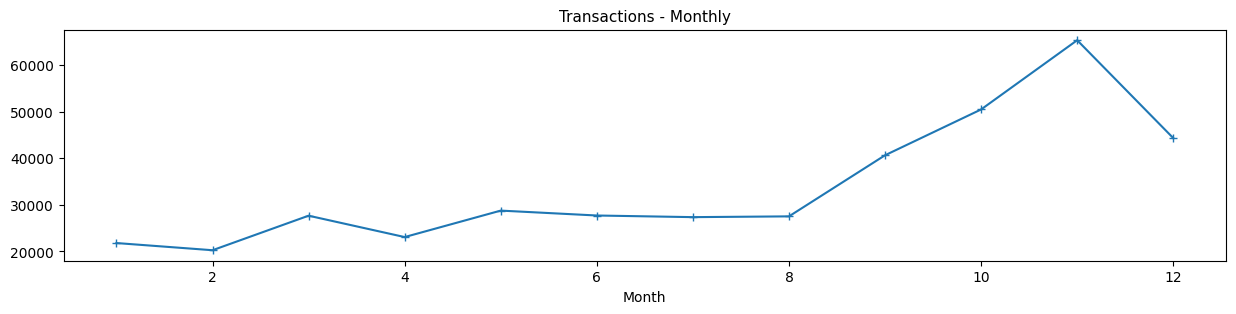

In [ ]:
# Sales transaction trend across months
months = main_df.groupby('Month')['Quantity'].count()
plt.figure(figsize=(15,3))
months.plot(marker='+')
plt.title("Transactions - Monthly", size=11)
plt.show()

The overall trend suggests that while there are fluctuations throughout the year, there is a significant increase in transactions in the later months, peaking in month 11, followed by a notable decline in the final month.